In [10]:
import math

from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Express

Wikipedia has some information on generating coprime pairs: https://en.wikipedia.org/wiki/Coprime_integers

In [28]:
def get_coprime_pairs(limit):
    pairs=dict()

    def build(m, n):
        p = (m, n)
        pairs[p]=[]
        
        for pc in [(2*m - n, m), (2*m + n, m), (m + 2*n, n)]:
            if pc[0] <= 20:
                pairs[p].append(pc)
                build(pc[0], pc[1])
    
    build(2, 1)
    build(3, 1)
    #for k, v in pairs.items():
    #    print(k, v)
    
    return sorted(pairs.keys())

pairs=get_coprime_pairs(20)
#pairs

In [29]:
def interference(m, n):
    for i in range(m, m*(n+1), m):
        if i == m*n:
            return i
        elif (i-1)%n == 0:
            return i
        elif (i+1)%n == 0:
            return i+1

interference(7, 5)

15

In [31]:
df=pd.DataFrame(data={"a":[x[0] for x in pairs],
                      "b":[x[1] for x in pairs]})
df['interference']=df.apply(lambda row: interference(row['a'], row['b']), axis=1)
#df

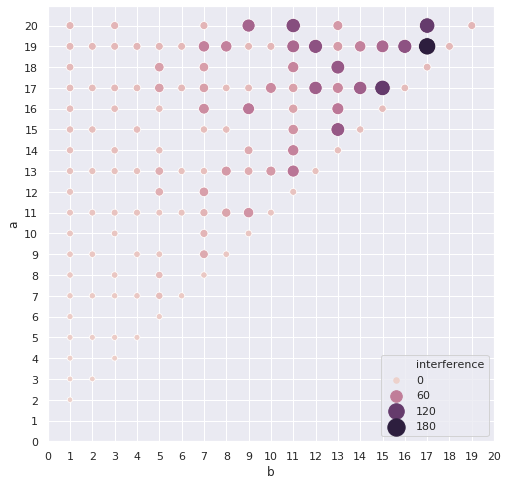

In [32]:
sns.set()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.scatterplot(data=df, 
                x='b', 
                y='a', 
                hue='interference', 
                size='interference',
                sizes=(30, 300))
ax.set_xticks(range(0, 21, 1))
ax.set_yticks(range(0, 21, 1))
plt.show()

In [51]:
maxp=None
maxi=0
for p in pairs:
    i = interference(*p)
    #print(p, i)
    if i > maxi:
        maxp=p
        maxi=i
print(maxp, maxi)

(19, 17) 153


In [31]:
interference(20, 17)

120

In [51]:
t = np.arange(0, 10, 0.1)
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [60]:
def x(n, t):
    #print(n, t)
    return n*np.cos(t*2*math.pi/n)

def y(n, t):
    return n*np.sin(t*2*math.pi/n)

ax=lambda t: x(3, t)
ay=lambda t: y(3, t)
bx=lambda t: x(4, t)
by=lambda t: y(4, t)
cx=lambda t: x(5, t)
cy=lambda t: y(5, t)

def area(t):
    return 0.5*np.abs(
        ax(t) * (by(t)-cy(t)) + 
        bx(t) * (cy(t)-ay(t)) + 
        cx(t) * (ay(t)-by(t)))

#print(t)
#print(area(t))
df = pd.DataFrame(data={
    't': t,
    'ax': ax(t),
    'ay': ay(t),
    'bx': bx(t),
    'by': by(t),
    'cx': cx(t),
    'cy': cy(t),
    'area': area(t)
})
df

,t,ax,ay,bx,by,cx,cy,area
0,0.0,3.000000,0.000000e+00,4.000000e+00,0.000000e+00,5.000000,0.000000e+00,0.000000
1,0.1,2.934443,6.237351e-01,3.950753e+00,6.257379e-01,4.960574,6.266662e-01,0.000540
2,0.2,2.740636,1.220210e+00,3.804226e+00,1.236068e+00,4.842916,1.243449e+00,0.004310
3,0.3,2.427051,1.763356e+00,3.564026e+00,1.815962e+00,4.648882,1.840623e+00,0.014516
4,0.4,2.007392,2.229434e+00,3.236068e+00,2.351141e+00,4.381533,2.408768e+00,0.034303
5,0.5,1.500000,2.598076e+00,2.828427e+00,2.828427e+00,4.045085,2.938926e+00,0.066734
6,0.6,0.927051,2.853170e+00,2.351141e+00,3.236068e+00,3.644843,3.422736e+00,0.114763
7,0.7,0.313585,2.983566e+00,1.815962e+00,3.564026e+00,3.187120,3.852566e+00,0.181203
8,0.8,-0.313585,2.983566e+00,1.236068e+00,3.804226e+00,2.679134,4.221640e+00,0.268710
9,0.9,-0.927051,2.853170e+00,6.257379e-01,3.950753e+00,2.128896,4.524135e+00,0.379751


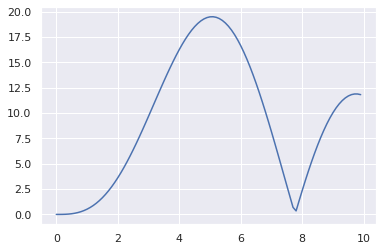

In [61]:
plt.plot(df['t'], df['area'])

$a = (3 \cos{\frac{2 \pi t}{3}},3 \sin{\frac{2 \pi t}{3}})$

$b = (4 \cos{\frac{2 \pi t}{4}},4 \sin{\frac{2 \pi t}{4}})$

$c = (5 \cos{\frac{2 \pi t}{5}},5 \sin{\frac{2 \pi t}{5}})$

$A = \frac{1}{2} | a_x (b_y - c_y) + b_x (a_y - c_y) + c_x (a_y - b_y) |$

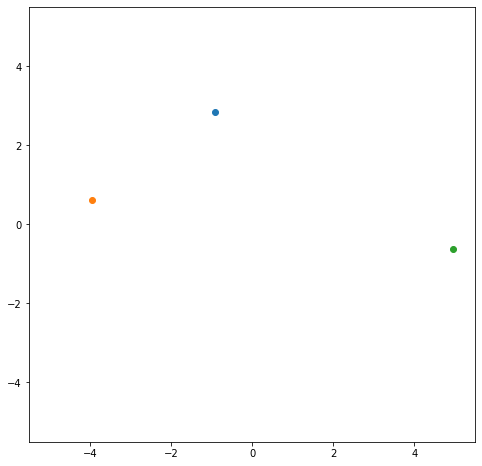

In [112]:
fig, axis = plt.subplots(1,1, figsize=(8, 8))

axis.set_ylim(-5.5, 5.5)
axis.set_xlim(-5.5, 5.5)
a, = axis.plot([], [], 'o')
b, = axis.plot([], [], 'o')
c, = axis.plot([], [], 'o')

def init():
    a.set_data([], [])
    b.set_data([], [])
    c.set_data([], [])
    return a, b, c,

def update(i):
    a.set_data(ax[i], ay[i])
    b.set_data(bx[i], by[i])
    c.set_data(cx[i], cy[i])
    return a, b, c,
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(x), blit=True)
HTML(anim.to_html5_video())
#axis.plot(x, ay)
#axis.plot(x, bx)
#axis.plot(x, cx)
#fig.show()